# PARTE 2: Algoritmo Árvores de Decisão

Nesta segunda parte do Trabalho você irá aplicar os algoritmos de Árvore de Decisão e de Floresta Aleatória na base de dados de risco de crédito discutida em aula. Para isso você deve primeiramente importar as bibliotecas necessárias.

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

# 1 - Importação dos dados Pré-Processados

a) importe o arquivo salvo como 'risco_credito.pkl'



In [102]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

# 2 - Algoritmo de Árvore de Decisão



a) importar da biblioteca sklearn o pacote DecisionTreeClassifier

b) Calcule a árvore de decisão, utilizando como critério a entropia.
Coloque como nome da variável: arvore_risco_credito

In [103]:
# b) Calcule a árvore de decisão, utilizando como critério a entropia.
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


c) Utilize o feature_importances_ para retornar a importância de cada atributo. Qual possui o maior ganho de informação?

In [104]:
# c) Utilize o feature_importances_ para retornar a importância de cada atributo. Qual possui o maior ganho de informação?
importancias = arvore_risco_credito.feature_importances_
nomes_atributos = ['historia', 'divida', 'garantias', 'renda']
print('Importância de cada atributo:', importancias)
maior_ganho = np.argmax(importancias)
print('Atributo com maior ganho de informação (índice):', maior_ganho)
print('Atributo com maior ganho de informação (nome):', nomes_atributos[maior_ganho])

Importância de cada atributo: [0.3362078  0.14179499 0.03885431 0.4831429 ]
Atributo com maior ganho de informação (índice): 3
Atributo com maior ganho de informação (nome): renda


d) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS: Adicione cores, nomes para os atributos e para as classes.

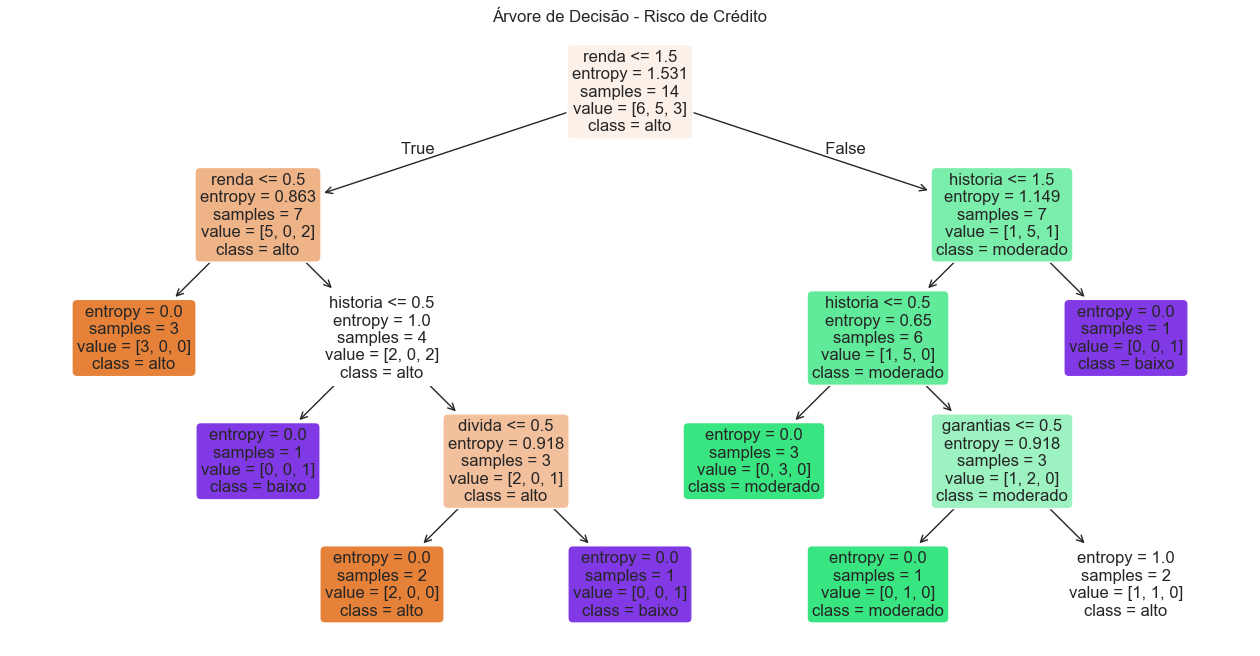

In [105]:
from sklearn import tree
plt.figure(figsize=(16,8))
nomes_atributos = ['historia', 'divida', 'garantias', 'renda']
nomes_classes = ['alto', 'moderado', 'baixo']
tree.plot_tree(
    arvore_risco_credito,
    feature_names=nomes_atributos,
    class_names=nomes_classes,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title('Árvore de Decisão - Risco de Crédito')
plt.show()

e) FAZER A PREVISÃO

Utilize .predict para fazer a previsão realizada no exemplo em sala.

   i. história boa, dívida alta, garantia nenhuma, renda > 35

   ii. história ruim, dívida alta, garantia adequada, renda < 15


Verifique nos slides se seu resultado está correto!

Já feito na parte 1 do trabalho.


#3 - Algoritmo de Árvore de Decisão para uma base de dados maior (Credit Data)

Nesta seção você deverá testar o uso da Árvore de Decisão para a Base de Dados Credit Risk Dataset. Aqui estaremos analisando os clientes que pagam (classe 0) ou não pagam a dívida (classe 1), a fim do banco conceder empréstimo.

In [106]:
# abrir o arquivo
with open('credit.pkl', 'rb') as f:
    dados = pickle.load(f)
    if len(dados) == 4:
        X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = dados

a) Ao abrir o arquivo utilize .shape para verificar o tamanho dos dados de treinamento e de teste

OBS: os dados de treinamento devem ter as seguintes dimenções: x=(1500, 3), y=(1500,); os dados de teste devem ter as seguintes dimenções: x=(500, 3), y=(500,)

In [107]:
# Verifique o tamanho dos dados de treinamento e teste
print('X_credit_treinamento.shape:', X_credit_treinamento.shape)
print('y_credit_treinamento.shape:', y_credit_treinamento.shape)
print('X_credit_teste.shape:', X_credit_teste.shape)
print('y_credit_teste.shape:', y_credit_teste.shape)

X_credit_treinamento.shape: (10, 4)
y_credit_treinamento.shape: (10,)
X_credit_teste.shape: (4, 4)
y_credit_teste.shape: (4,)


b) Importe o pacote DecisionTreeClassifier do sklearn para treinar o seu algoritmo de árvore de decisão. Para poder refazer os testes e obter o mesmo resultado utilize o parâmetro random_state = 0.

c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões

In [108]:
from sklearn.metrics import accuracy_score, classification_report

e) Faça a análise da Matriz de Confusão.

i. Quantos clientes foram classificados corretamente que pagam a dívida?

ii. Quantos clientes foram classificados incorretamente como não pagantes?

iii. Quantos clientes foram classificados corretamente que não pagam?

iv. Quantos clientes foram classificados incorretamente como pagantes?

In [109]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

ModuleNotFoundError: No module named 'yellowbrick'

f) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?

g) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS 1: Os atributos previsores são = ['income', 'age', 'loan']

OBS 2: Adicione cores, nomes para os atributos e para as classes. Você pode utilizar a função fig.savefig para salvar a árvore em uma imagem .png

# Algoritmo Random Forest

Nesta seção iremos utilizar o algoritmo Random Forest para a mesma base de crédito (**Credit Risk Dataset**) - arquivo *credit.pkl*.

a) Importe o pacote RandomForestClassifier do sklearn para treinar o seu algoritmo de floresta randomica.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

b) Para gerar a classificação você deve adicionar alguns parâmetros:
*   n_estimators=10  --> número de árvores que você irá criar
*   criterion='entropy'
*   random_state = 0

c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões. O resultado foi melhor do que a árvore de decisão simples?

e) Se o resultado foi inferior, como você poderia resolver isso? Quais foram os resultados obtidos?

f) Faça a análise da Matriz de Confusão.

g) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?